# Project: Valuing real estate properties using machine learning

## Part 1: From EDA to data preparation

The objective of this project is to create a machine learning model that values real estate properties in Argentina.

For this we will use the dataset available at https://www.properati.com.ar.
This dataset contains the following features:

- **id**: Identifier of the ad. It is not unique: if the notice is updated by the real estate agency (new version of the notice) a new record is created with the same id but different dates: registration and cancellation.
- **ad_type**:  Type of ad (Property, Development/Project).
- **start_date**:  Date of entry of the ad.
- **end_date**:  Date of cancellation of the ad.
- **created_on**:  Date of registration of the first version of the ad.
- **lat**:  Latitude.
- **lon**: Longitude.
- **l1**:  Administrative level 1: country.
- **l2**:  Administrative level 2: usually province.
- **l3**:  Administrative level 3: usually city.
- **l4**: Administrative level 4: usually neighborhood.
- **l5**:  Administrative level 5: not defined.
- **l6**:  Administrative level 6: not defined.
- **rooms**:  Number of environments (useful in Argentina).
- **bedrooms**:  Number of bedrooms (useful in the rest of the countries).
- **bathrooms**:  Number of bathrooms.
- **surface_total**:  Total area in m².
- **surface_covered**:  Covered area in m².
- **price**:  Price published in the ad.
- **currency**:   Currency of the published price.
- **price_period**:  Price Period (Daily, Weekly, Monthly)
- **title**: Title of the ad.
- **description**: Ad Description.
- **property_type**:  Type of property (House, Apartment, PH, plot of land, etc.).
- **operation_type**:  Type of operation (Sale, Rent).


In [161]:
#Importings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
%matplotlib inline

In [162]:
#Helper function
def cat_plot(data, col):
    total_ads = len(data)
    temp_df = pd.Series((data[col].value_counts() / total_ads) * 100)
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.axhline(y=5, color='red')
    fig.set_ylabel('Percentage of ads')
    plt.show()
    return fig

In [163]:
#Loding the data
dataset = pd.read_csv("ar_properties.csv")

## Exploratory Data Analysis

In [164]:
dataset.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
1,9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
2,tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler
3,Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,...,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...,Lote,Venta
4,bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,...,1.0,76.0,66.0,NaN,NaN,Mensual,Departamento - Rosario,PORTAL DE LOS MARINOS<br>Es un complejo de viv...,Departamento,Venta


In [165]:
print("The dataframe contains {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))

The dataframe contains 1000000 rows and 25 columns


In [166]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              863498 non-null   float64
 6   lon              862598 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               959375 non-null   object 
 10  l4               260280 non-null   object 
 11  l5               5237 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            583440 non-null   float64
 14  bedrooms         518261 non-null   float64
 15  bathrooms        775634 non-null   float64
 16  surface_total    39

In [167]:
#Checking duplicate ads
dataset.duplicated(subset="id").sum()

0

This dataframe has no duplicated values but we can see that it has NaNs values. Besides, taking in account the objective of this project we will evaluate which columns are necessary. Those not necessary will be discarded. 

In [168]:
#Drop not necessary columns
df = dataset.drop(["ad_type","id", "start_date", "end_date", "created_on", "lat", "lon", "l6", "title", "description"], axis=1)

In [169]:
df.shape

(1000000, 15)

For some reason, there are publications of properties that have a larger covered surface area than the total surface area. This is not correct, so this dataset will be filtered.

In [170]:
#Restriction
mask = df.surface_covered <= df.surface_total
df = df[mask]
df.reset_index(inplace=True, drop=True)

### Categorical features analysis

In [171]:
#Categorical features analysis:
categorical = df.select_dtypes(include="object")
categorical_list = categorical.columns.to_list()
categorical.isna().sum()

l1                     0
l2                     0
l3                  9516
l4                234528
l5                341764
currency           17003
price_period      158274
property_type          0
operation_type         0
dtype: int64

The dataset contains several features with NaN values. Therefore, handling missing values will be necessary.

### Feature analysis

**l1 column**

In [172]:
df.l1.value_counts()

Argentina         336907
Uruguay             7249
Estados Unidos       563
Brasil                59
Name: l1, dtype: int64

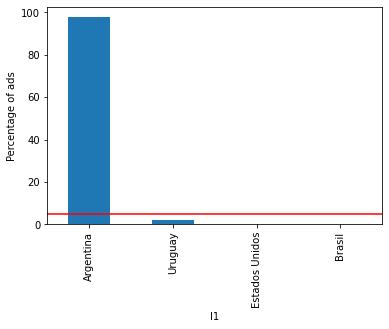

<AxesSubplot:xlabel='l1', ylabel='Percentage of ads'>

In [173]:
cat_plot(df, "l1")

We can see that most ads are from Argentina. It is our objective to construct a model that predict real state values from Argentina. So we will discard those ads from other countries. We chose a country since the real estate market will vary strongly according to state policies that are foreign to the data provided. In addition, the other countries represent less than 5% of the ads in the dataset.

In [174]:
mask1 = df.l1 == "Argentina"
df = df[mask1]

**l2 column**

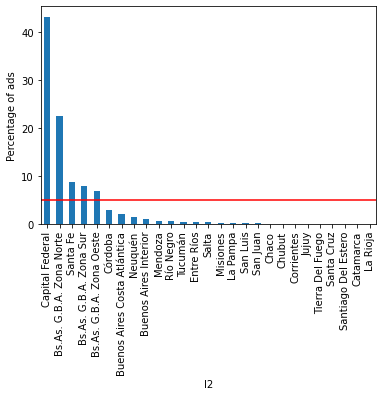

<AxesSubplot:xlabel='l2', ylabel='Percentage of ads'>

In [175]:
cat_plot(df, "l2")

We note that most of the publications belong to the regions of Buenos Aires and the province of Santa Fe. The other regions have publications that account for less than 5% of the total number of publications. 

In [176]:
list(set(df.l2))

['Bs.As. G.B.A. Zona Oeste',
 'La Rioja',
 'Tierra Del Fuego',
 'Chubut',
 'La Pampa',
 'Corrientes',
 'Salta',
 'Catamarca',
 'Chaco',
 'Buenos Aires Interior',
 'Misiones',
 'Tucumán',
 'Buenos Aires Costa Atlántica',
 'San Luis',
 'Mendoza',
 'Santa Fe',
 'San Juan',
 'Córdoba',
 'Bs.As. G.B.A. Zona Norte',
 'Entre Ríos',
 'Capital Federal',
 'Río Negro',
 'Neuquén',
 'Santiago Del Estero',
 'Santa Cruz',
 'Bs.As. G.B.A. Zona Sur',
 'Jujuy']

In [177]:
bsas = [x for x in list(set(df.l2)) if x.startswith('B')]

In [178]:
bsas

['Bs.As. G.B.A. Zona Oeste',
 'Buenos Aires Interior',
 'Buenos Aires Costa Atlántica',
 'Bs.As. G.B.A. Zona Norte',
 'Bs.As. G.B.A. Zona Sur']

In [179]:
interior = [x for x in list(set(df.l2)) if (x != "Capital Federal") and (x not in bsas)]

In [180]:
interior

['La Rioja',
 'Tierra Del Fuego',
 'Chubut',
 'La Pampa',
 'Corrientes',
 'Salta',
 'Catamarca',
 'Chaco',
 'Misiones',
 'Tucumán',
 'San Luis',
 'Mendoza',
 'Santa Fe',
 'San Juan',
 'Córdoba',
 'Entre Ríos',
 'Río Negro',
 'Neuquén',
 'Santiago Del Estero',
 'Santa Cruz',
 'Jujuy']

In [181]:
df.l2.replace(to_replace=interior, value= "Interior", inplace=True)
df.l2.replace(to_replace=bsas, value= "Buenos Aires", inplace=True)

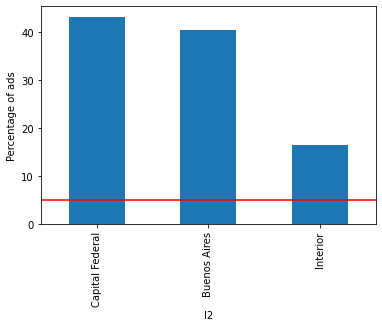

<AxesSubplot:xlabel='l2', ylabel='Percentage of ads'>

In [182]:
cat_plot(df, "l2")

**l3 column**

In [183]:
len(df.l3.unique())

698

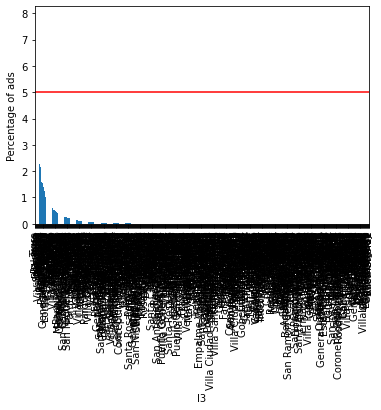

<AxesSubplot:xlabel='l3', ylabel='Percentage of ads'>

In [184]:
cat_plot(df, "l3")

This feature will introduce high cardinality into the model. There are 698 different location, most of them with low prevalence. This would lead to overfitting problems.

In [185]:
df = df.drop("l3", axis=1)

**currency column**

In [186]:
df.currency.fillna("unknown", inplace=True)
df.currency.value_counts()

USD        241826
ARS         78173
unknown     16734
PEN           174
Name: currency, dtype: int64

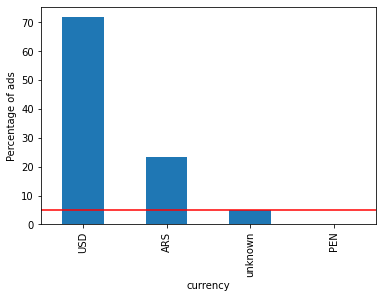

<AxesSubplot:xlabel='currency', ylabel='Percentage of ads'>

In [187]:
cat_plot(df, "currency")

We can observe that for most advertisements currency is dollars. As this data is directly related to the target "precio" (price), we should unify the unit of the paper currency used. One option would be to convert the price in argentine pesos to dollars. Since the Argentine economy is very unstable and the value of the dollar is so variable and dependent on several factors, it is difficult to follow this option to obtain a reliable model. Therefore, we will choose to eliminate those publications made in currencies other than dollars.

In [188]:
to_replace = {"unknown": np.nan}
df.currency.replace(to_replace, value=None, inplace=True)

In [189]:
mask2 = df.currency == "USD"
df = df[mask2]

**property_type column**

In [190]:
df.property_type.value_counts()

Departamento       129812
Casa                70964
PH                  13311
Oficina              8274
Local comercial      7701
Lote                 4492
Otro                 3557
Cochera              1512
Depósito             1512
Casa de campo         691
Name: property_type, dtype: int64

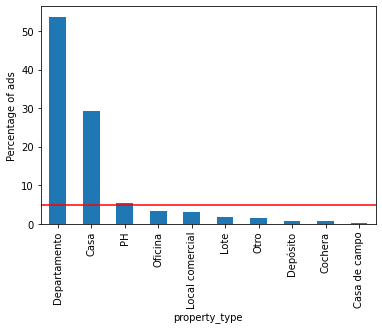

<AxesSubplot:xlabel='property_type', ylabel='Percentage of ads'>

In [191]:
cat_plot(df, "property_type")

Some property type categories represent less than 5% of the published ads. We will only retain those whose number of publications is greater than 5%. But we can group those categories under "Otro" (others). We already have an "Otro" category so one solution could be to append those ads whose property_type is under 5% to "Otro" category.

In [192]:
df.property_type.replace(["Casa de campo", "Cochera", "Depósito", "Lote", "Local comercial", "Oficina"], value= "Otro", inplace=True)

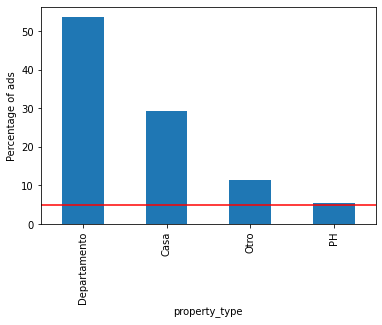

<AxesSubplot:xlabel='property_type', ylabel='Percentage of ads'>

In [193]:
cat_plot(df, "property_type")

**price_period column**

In [194]:
df.price_period.fillna("unknown", inplace=True)
df.price_period.value_counts()

Mensual    120932
unknown    120878
Semanal        15
Diario          1
Name: price_period, dtype: int64

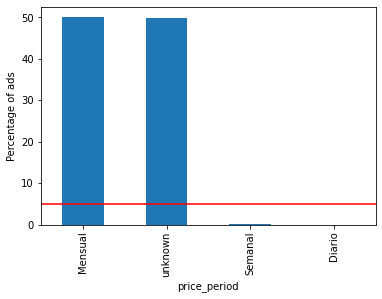

<AxesSubplot:xlabel='price_period', ylabel='Percentage of ads'>

In [195]:
cat_plot(df, "price_period")

Most publications are unknown and monthly ads. Daily and weekly publications do not exceed 5% of the publications. 

In [196]:
print("Percentage of unknown =" ,round(df[(df['price_period'] =='unknown')].shape[0]/df.shape[0]*100,2),'%')

Percentage of unknown = 49.99 %


Here we have two options: discard unknown values and select only those monthly posted or impute unknown values as monthly posted ads.

In [197]:
df.price_period.replace(to_replace, value=None, inplace=True)

In [198]:
#We select only those ads that are monthly paid
mask3 = df.price_period == "Mensual"
df = df[mask3]

**operation_type column**

In [199]:
df.operation_type.value_counts()

Venta                108139
Alquiler               6970
Alquiler temporal      5823
Name: operation_type, dtype: int64

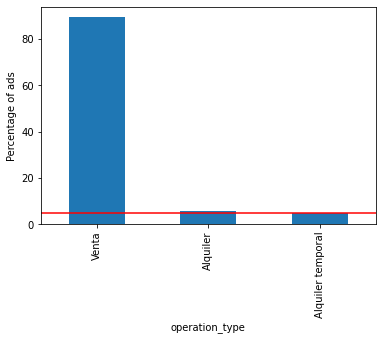

<AxesSubplot:xlabel='operation_type', ylabel='Percentage of ads'>

In [200]:
cat_plot(df, "operation_type")

The type of operation of most of the publications is sale. Sale and rent are very different operations that would definitely influence the target. As most operations are sale we will only take those.

In [201]:
#df.operation_type.replace(to_replace="Alquiler temporal", value="Alquiler", inplace=True)

In [202]:
#df = df.drop("operation_type", axis=1)

### Outliers detection and elimination

In [203]:
df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,96768.000000,99524.000000,112835.000000,120932.000000,120932.000000,1.209320e+05
mean,3.324487,2.512781,1.932920,284.514769,179.312035,2.592047e+05
std,1.794975,1.801686,1.216949,1988.200749,804.956589,5.204972e+05
min,1.000000,1.000000,1.000000,10.000000,1.000000,5.000000e+01
25%,2.000000,1.000000,1.000000,56.000000,50.000000,8.000000e+04
50%,3.000000,2.000000,2.000000,103.000000,89.000000,1.500000e+05
75%,4.000000,3.000000,2.000000,221.000000,183.000000,2.890000e+05
max,35.000000,123.000000,20.000000,180000.000000,123000.000000,4.600000e+07


We can see that there are indeed outliers. It is unlikely that there are properties with 35 rooms, 123 bedrooms, or 20 bathrooms, for example. 

In [204]:
#Numeric features
numeric_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()

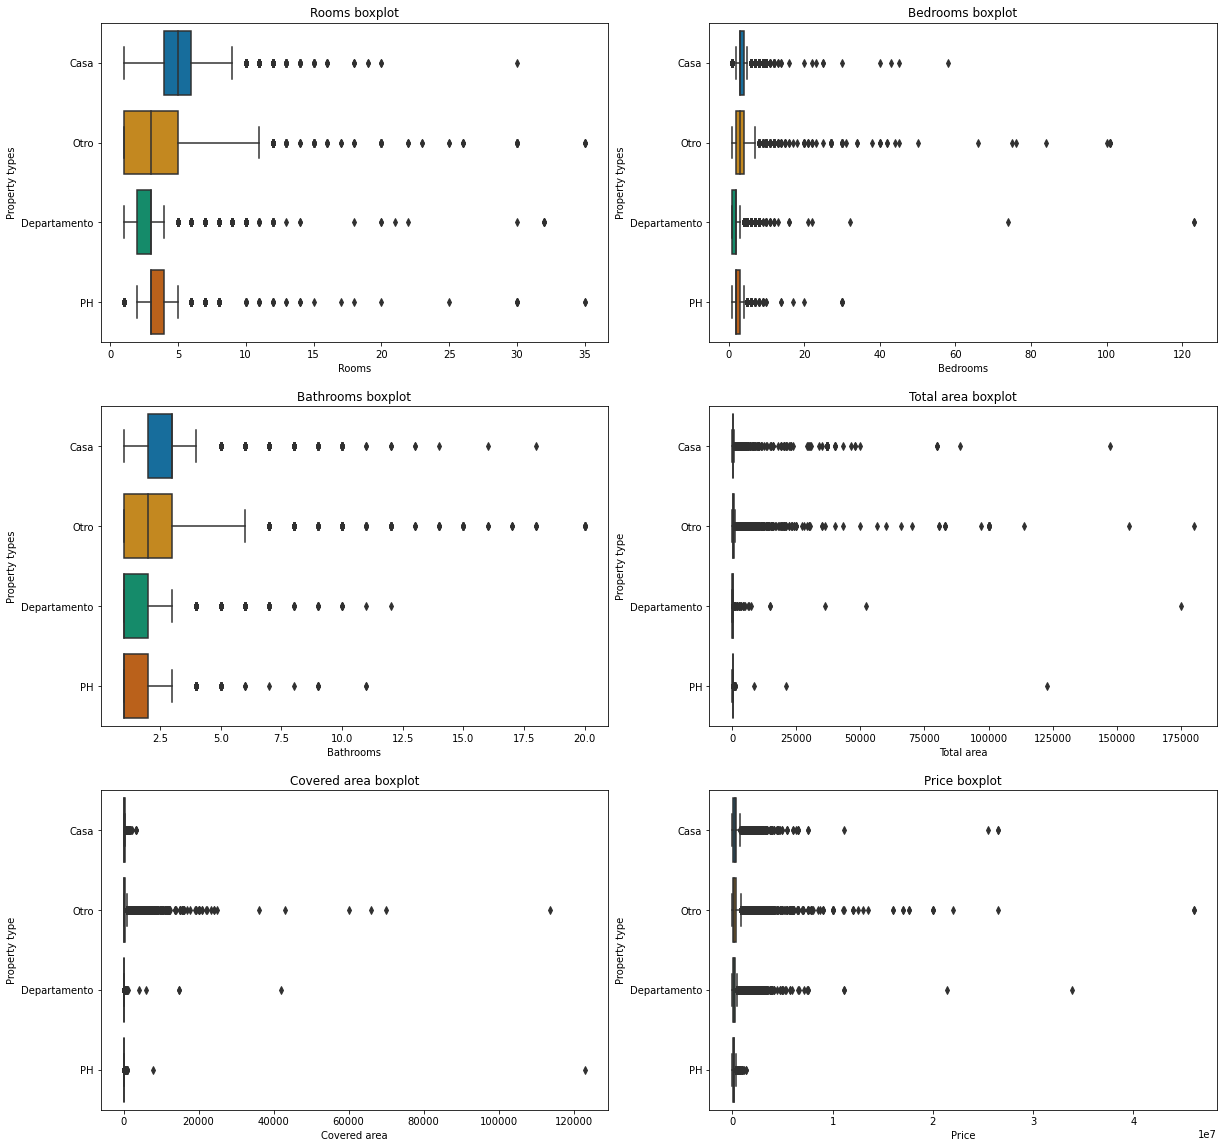

In [205]:
plt.figure(figsize = (20,20))
plt.subplot(3, 2, 1)
sns.boxplot(data = df, x= 'rooms', y = 'property_type', palette = 'colorblind')
plt.title('Rooms boxplot')
plt.xlabel('Rooms')
plt.ylabel('Property types')

plt.subplot(3, 2, 2)
sns.boxplot(data = df, x= 'bedrooms', y = 'property_type', palette = 'colorblind')
plt.title('Bedrooms boxplot')
plt.xlabel('Bedrooms')
plt.ylabel('Property types')

plt.subplot(3, 2, 3)
sns.boxplot(data = df, x= 'bathrooms', y = 'property_type', palette = 'colorblind')
plt.title('Bathrooms boxplot')
plt.xlabel('Bathrooms')
plt.ylabel('Property types')

plt.subplot(3, 2, 4)
sns.boxplot(data = df, x= 'surface_total', y = 'property_type', palette = 'colorblind')
plt.title('Total area boxplot')
plt.xlabel('Total area')
plt.ylabel('Property type')

plt.subplot(3, 2, 5)
sns.boxplot(data = df, x= 'surface_covered', y = 'property_type', palette = 'colorblind')
plt.title('Covered area boxplot')
plt.xlabel('Covered area')
plt.ylabel('Property type')

plt.subplot(3, 2, 6)
sns.boxplot(data = df, x= 'price', y = 'property_type', palette = 'colorblind')
plt.title('Price boxplot')
plt.xlabel('Price')
plt.ylabel('Property type')

plt.show()

In [206]:
def remove_outliers(dfx):
    q1 = dfx.quantile(0.25)
    q3 = dfx.quantile(0.75)
    iqr = q3 - q1
    cut_off = iqr*1.5
    
    df_filtred = dfx[~((dfx < (dfx.quantile(0.25) - cut_off)) | (dfx > (dfx.quantile(0.75) + cut_off))).any(axis=1)]
       
    return df_filtred

In [207]:
df2 = remove_outliers(df)

In [208]:
df2.shape

(97783, 14)

### Missing values analysis

In [209]:
num_nans = df2.isna().sum()
num_nans

l1                     0
l2                     0
l4                 66050
l5                 97201
rooms              13296
bedrooms           16294
bathrooms           4979
surface_total          0
surface_covered        0
price                  0
currency               0
price_period           0
property_type          0
operation_type         0
dtype: int64

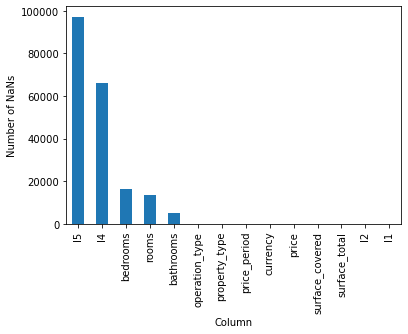

In [210]:
total_ads = len(df2)
cols_df2 = df2.columns.to_list()
num_nans = df2.isna().sum()

fig = df2.isna().sum().sort_values(ascending=False).plot.bar()
fig.set_xlabel("Column")
fig.set_ylabel("Number of NaNs")

plt.show()

In [211]:
for col in cols_df2:
    print(f"Percentage of NaNs in {col} =", round(df2[(df2[col].isna())].shape[0] / df2.shape[0]*100,2), '%')

Percentage of NaNs in l1 = 0.0 %
Percentage of NaNs in l2 = 0.0 %
Percentage of NaNs in l4 = 67.55 %
Percentage of NaNs in l5 = 99.4 %
Percentage of NaNs in rooms = 13.6 %
Percentage of NaNs in bedrooms = 16.66 %
Percentage of NaNs in bathrooms = 5.09 %
Percentage of NaNs in surface_total = 0.0 %
Percentage of NaNs in surface_covered = 0.0 %
Percentage of NaNs in price = 0.0 %
Percentage of NaNs in currency = 0.0 %
Percentage of NaNs in price_period = 0.0 %
Percentage of NaNs in property_type = 0.0 %
Percentage of NaNs in operation_type = 0.0 %


A large number of missing values are observed in columns l4 and l5 features (more than 20% of NaN values). Those features refers to regions or neighborhoods that would be difficult to impute. Also imputing them would create a great bias. Therefore, this features will be eliminated.

In [212]:
df3 = df2.drop(["l4", "l5"], axis=1) # Eliminate NaNs values where %NaNs > 20%

In [213]:
df3.reset_index(inplace=True, drop=True)

### **MCAR, MAR or MNAR**

<AxesSubplot:>

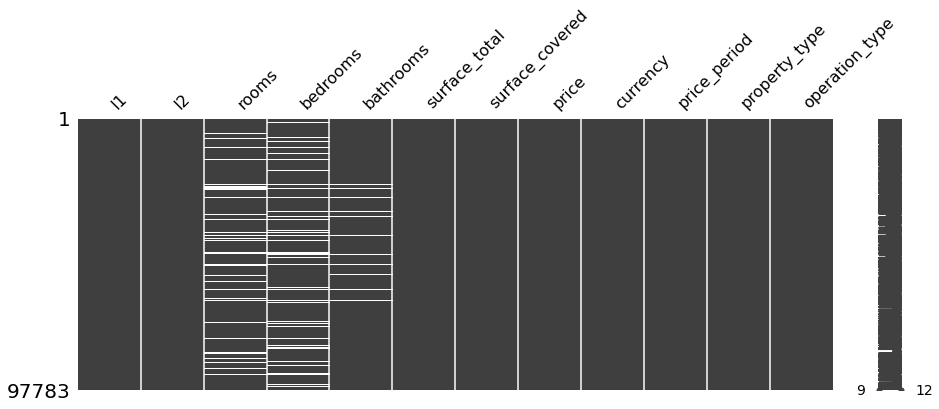

In [214]:
msno.matrix(df3, figsize=(15,5))

<AxesSubplot:>

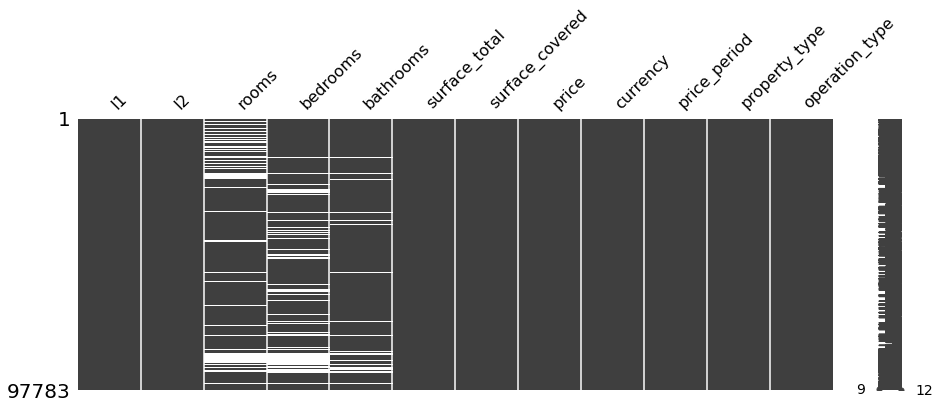

In [215]:
df3_sorted = df3.sort_values("property_type")
msno.matrix(df3_sorted, figsize=(15,5))

In [216]:
df3_sorted.property_type.unique()

array(['Casa', 'Departamento', 'Otro', 'PH'], dtype=object)

Even when we sort by "property_type", the values of l3 still look random. This could prove these values are missing completely at random (MCAR). For "rooms", "bedrooms" and "bathrooms" NaNs values could be missing at random (MAR). When the dataset is sorted by "property_type" it is observed a grouping behaviour in NaNs values from those features. Maybe this is due to property types that do not have a room, bedroom or a bathrooms like "Lote" or "Cochera". 
Another way would be by plotting a heat map to see if the missingness has any correlation:

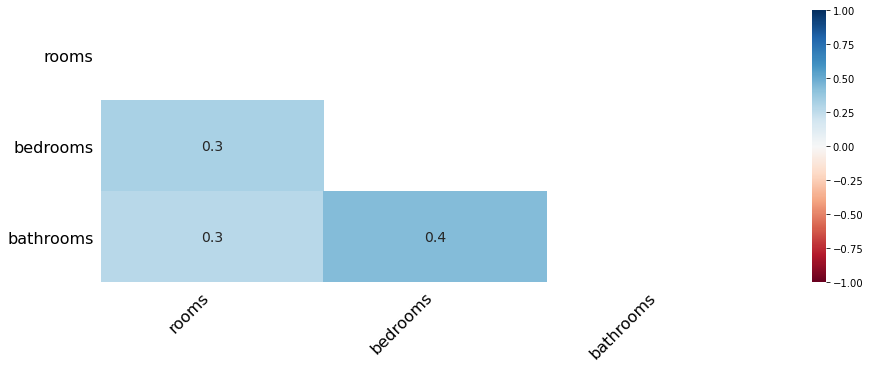

In [217]:
fig = msno.heatmap(df3, figsize=(15,5))
plt.show()

Missing observations in rooms, bedrooms and bathrooms have little correlation. 

### Missing values imputation

In [218]:
#Missing values by property type 
df3.set_index("property_type")[["bedrooms", "rooms", "bathrooms"]].isnull().groupby(level=0).sum()

,bedrooms,rooms,bathrooms
property_type,,,
Casa,813,5345,706
Departamento,8041,2030,1397
Otro,7198,5610,2711
PH,242,311,165


In [219]:
#imputation by property type

property_types = df3.property_type.unique().tolist()

# Buscamos los valores más frecuentes
most_frequent_bath = df3.groupby(['property_type'])['bathrooms'].agg(pd.Series.mode)
most_frequent_bath = dict(most_frequent_bath)
print(most_frequent_bath)
most_frequent_rooms = df3.groupby(['property_type'])['rooms'].agg(pd.Series.mode)
most_frequent_rooms = dict(most_frequent_rooms)
print(most_frequent_rooms)
most_frequent_bed = df3.groupby('property_type')['bedrooms'].agg(pd.Series.mode)
most_frequent_bed = dict(most_frequent_bed)
print(most_frequent_bed)

{'Casa': 2.0, 'Departamento': 1.0, 'Otro': 1.0, 'PH': 1.0}
{'Casa': 4.0, 'Departamento': 2.0, 'Otro': 1.0, 'PH': 3.0}
{'Casa': 3.0, 'Departamento': 1.0, 'Otro': 2.0, 'PH': 2.0}


In [220]:
df3.bathrooms = df3.bathrooms.fillna(df3.property_type.map(most_frequent_bath)) 
df3.rooms = df3.rooms.fillna(df3.property_type.map(most_frequent_rooms))
df3.bedrooms = df3.bedrooms.fillna(df3.property_type.map(most_frequent_bed))

In [221]:
df3.shape

(97783, 12)

### Numerical features analysis

In [222]:
#Numeric features
num_cols = df3.select_dtypes(include=["int", "float"]).columns.tolist()

In [223]:
print(num_cols)

['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']


**rooms**

In [224]:
df3.groupby("property_type")["rooms"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Casa,23474.0,4.280566,0.972028,1.0,4.0,4.0,5.0,7.0
Departamento,59480.0,2.512374,1.074902,1.0,2.0,2.0,3.0,7.0
Otro,8465.0,1.561843,1.271780,1.0,1.0,1.0,1.0,7.0
PH,6364.0,3.268542,0.979762,1.0,3.0,3.0,4.0,7.0


**bedrooms**

In [225]:
df3.groupby("property_type")["bedrooms"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Casa,23474.0,2.990500,0.797017,1.0,3.0,3.0,3.0,6.0
Departamento,59480.0,1.662239,0.824730,1.0,1.0,1.0,2.0,6.0
Otro,8465.0,2.050679,0.460292,1.0,2.0,2.0,2.0,6.0
PH,6364.0,2.201917,0.847989,1.0,2.0,2.0,3.0,6.0


Notice that department have negative values. This is not correct, so need to be fixed.

<AxesSubplot:>

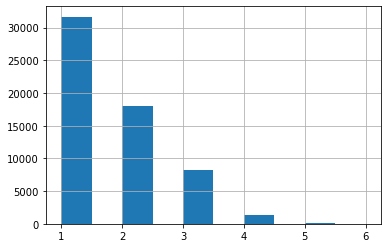

In [226]:
df3[df3.property_type == "Departamento"]["bedrooms"].hist()

**bathrooms**

In [227]:
df3.groupby("property_type")["bathrooms"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Casa,23474.0,2.076425,0.734310,1.0,2.0,2.0,3.0,3.0
Departamento,59480.0,1.351479,0.584637,1.0,1.0,1.0,2.0,3.0
Otro,8465.0,1.399055,0.631932,1.0,1.0,1.0,2.0,3.0
PH,6364.0,1.357951,0.557349,1.0,1.0,1.0,2.0,3.0


**surface_total**

In [228]:
df3.groupby("property_type")["surface_total"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Casa,23474.0,199.683820,83.236846,10.0,140.0,194.0,250.0,468.0
Departamento,59480.0,73.037391,42.869941,10.0,44.0,61.0,88.0,462.0
Otro,8465.0,127.128884,100.590856,10.0,47.0,97.0,186.0,467.0
PH,6364.0,105.020427,55.573242,10.0,66.0,93.0,130.0,442.0


**surface_covered**

In [229]:
df3.groupby("property_type")["surface_covered"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Casa,23474.0,166.223524,66.988888,1.0,117.0,160.0,206.0,382.0
Departamento,59480.0,64.624563,36.473209,1.0,40.0,55.0,77.0,380.0
Otro,8465.0,117.300177,92.757019,1.0,44.0,90.0,169.0,382.0
PH,6364.0,82.565839,39.204520,1.0,55.0,75.0,100.0,380.0


**price**

In [230]:
df3.groupby("property_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Casa,23474.0,197324.513377,138924.357658,50.0,95000.0,180000.0,289000.0,600000.0
Departamento,59480.0,155806.948655,114872.174817,50.0,79500.0,125000.0,200000.0,602312.0
Otro,8465.0,150216.166332,139442.855819,50.0,35000.0,115000.0,220000.0,600000.0
PH,6364.0,152567.916091,84090.663302,450.0,90000.0,135000.0,195000.0,590000.0


### Target distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

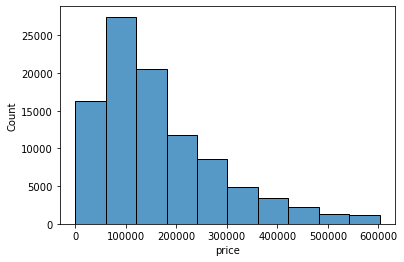

In [231]:
#Target distribution
sns.histplot(data = df3, x="price", bins=10)

In [232]:
# create a copy of data
data_copy = df3.copy()# create a new feature Log_Price
data_copy['Log_Price'] = np.log(df3['price'])

In [233]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
a = pt.fit_transform(df3[['price']])
data_copy['box_cox_price'] = a

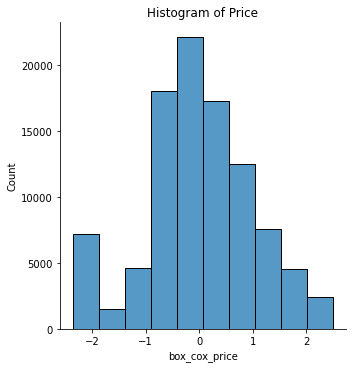

In [234]:
sns.displot(data=data_copy, x="box_cox_price", bins=10)
plt.title("Histogram of Price")
plt.show()

### Final dataset:

In [235]:
df3.reset_index(inplace=True, drop=True)

In [236]:
final_df = df3.drop(["l1", "currency"], axis=1)

In [237]:
final_df.head()

,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_period,property_type,operation_type
0,Buenos Aires,7.0,3.0,3.0,330.0,300.0,3000.0,Mensual,Casa,Alquiler
1,Buenos Aires,3.0,2.0,1.0,75.0,75.0,165000.0,Mensual,Otro,Venta
2,Capital Federal,1.0,2.0,3.0,265.0,265.0,600000.0,Mensual,Otro,Venta
3,Capital Federal,5.0,2.0,3.0,150.0,150.0,195000.0,Mensual,Otro,Venta
4,Capital Federal,1.0,2.0,1.0,80.0,80.0,155000.0,Mensual,Otro,Venta


In [238]:
final_df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,97783.000000,97783.000000,97783.000000,97783.000000,97783.000000,97783.000000
mean,2.903777,2.049855,1.530051,110.204616,94.742389,165078.950319
std,1.358270,0.967820,0.697573,81.528285,67.552229,123020.983014
min,1.000000,1.000000,1.000000,10.000000,1.000000,50.000000
25%,2.000000,1.000000,1.000000,50.000000,45.000000,79900.000000
50%,3.000000,2.000000,1.000000,80.000000,70.000000,135000.000000
75%,4.000000,3.000000,2.000000,147.000000,124.000000,227000.000000
max,7.000000,6.000000,3.000000,468.000000,382.000000,602312.000000


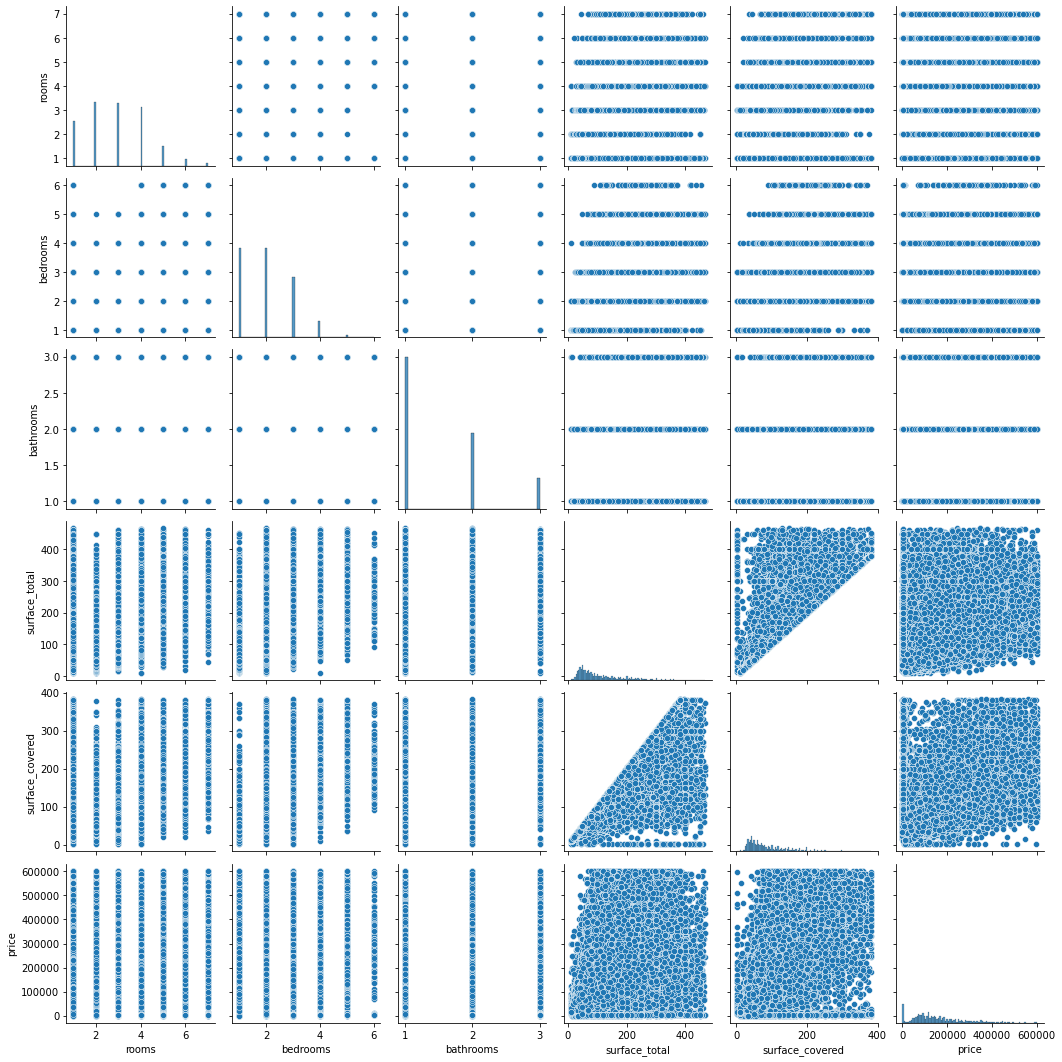

In [239]:
sns.pairplot(final_df)

In [240]:
final_df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.786353,0.585004,0.600356,0.607169,0.363130
bedrooms,0.786353,1.000000,0.669590,0.677920,0.696507,0.405558
bathrooms,0.585004,0.669590,1.000000,0.617996,0.657126,0.429388
surface_total,0.600356,0.677920,0.617996,1.000000,0.907058,0.371325
surface_covered,0.607169,0.696507,0.657126,0.907058,1.000000,0.388563
price,0.363130,0.405558,0.429388,0.371325,0.388563,1.000000


In [241]:
final_df.to_csv('Properaty_data_clean.csv', index=False)